<a href="https://colab.research.google.com/github/moraish/AOE_data_analysis/blob/main/AOE_2_ANALYSIS_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Age of Empires - II

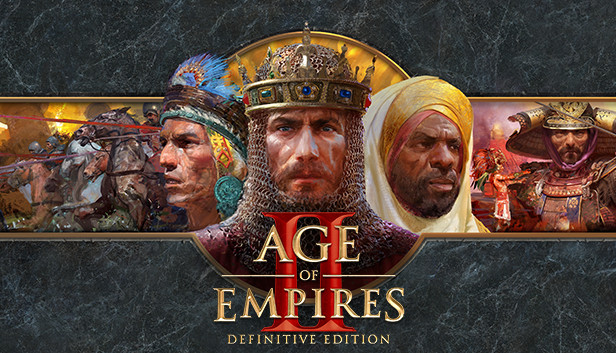


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches_path = '/content/matches.parquet'
players_path = '/content/players.parquet'

In [3]:
matches = pd.read_parquet(matches_path)
players = pd.read_parquet(players_path)

In [4]:
matches.head()

,map,started_timestamp,duration,irl_duration,game_id,avg_elo,num_players,team_0_elo,team_1_elo,replay_enhanced,leaderboard,mirror,patch,raw_match_type,game_type,game_speed,starting_age
0,nomad,2025-01-12 00:00:39+00:00,0 days 00:05:14.500000,0 days 00:03:05,364717295,1427.833333,6,1425.666667,1430.0,False,team_random_map,False,125283,8,random_map,normal,dark
1,arabia,2025-01-12 00:08:07+00:00,0 days 00:07:01.600000,0 days 00:04:08,364718531,1460.250000,8,1476.500000,1444.0,False,team_random_map,False,125283,9,random_map,normal,dark
2,arena,2025-01-12 00:18:23+00:00,0 days 00:00:13.600000,0 days 00:00:08,364720393,1202.000000,2,1208.000000,1196.0,False,random_map,False,125283,6,random_map,normal,dark
3,arabia,2025-01-12 00:02:20+00:00,0 days 00:27:35.800000,0 days 00:16:14,364717802,1094.000000,2,1114.000000,1074.0,False,random_map,False,125283,6,random_map,normal,dark
4,black_forest,2025-01-12 00:08:07+00:00,0 days 00:20:25.700000,0 days 00:12:01,364718550,1314.125000,8,1304.750000,1323.5,False,team_random_map,False,125283,9,random_map,normal,dark


In [5]:
players.head()

,winner,game_id,team,feudal_age_uptime,castle_age_uptime,imperial_age_uptime,old_rating,new_rating,match_rating_diff,replay_summary_raw,profile_id,civ,opening
0,True,364722256,0,None,None,None,1064,1081,-0.5,{},3133161,mongols,None
1,False,364722256,1,None,None,None,1103,1086,0.5,{},3558673,turks,None
2,True,364722256,0,None,None,None,1108,1123,-0.5,{},407302,koreans,None
3,False,364722256,1,None,None,None,1032,1018,0.5,{},2392591,italians,None
4,True,364722256,0,None,None,None,1113,1136,-0.5,{},21737392,goths,None


## Data Dictionary

### Matches
1. map - game map
2. duration - length of the game
3. game_id - unique game identifier
4. avg_elo - average rating of the players involved in the game
5. num_players - number of players involved in the game
6. team_0_elo - average rating of the players in the first team
7. team_1_elo - average rating of the players in the second team

### Players
1. winner - 1 for winner and 0 for loser
2. game_id - unique game identifier
3. team - player team_number 0 or 1
4. profile_id - unique player id
5. civ - civilization selected by the player

## Data Cleaning

1. Removing columns that are not required
2. Validating the data in the remaining columns

In [13]:
trimmed_matches = matches.drop(columns=['replay_enhanced', 'leaderboard', 'mirror', 'patch', 'raw_match_type', 'game_type', 'game_speed', 'starting_age' ])
trimmed_matches.head()

,map,started_timestamp,duration,irl_duration,game_id,avg_elo,num_players,team_0_elo,team_1_elo
0,nomad,2025-01-12 00:00:39+00:00,0 days 00:05:14.500000,0 days 00:03:05,364717295,1427.833333,6,1425.666667,1430.0
1,arabia,2025-01-12 00:08:07+00:00,0 days 00:07:01.600000,0 days 00:04:08,364718531,1460.250000,8,1476.500000,1444.0
2,arena,2025-01-12 00:18:23+00:00,0 days 00:00:13.600000,0 days 00:00:08,364720393,1202.000000,2,1208.000000,1196.0
3,arabia,2025-01-12 00:02:20+00:00,0 days 00:27:35.800000,0 days 00:16:14,364717802,1094.000000,2,1114.000000,1074.0
4,black_forest,2025-01-12 00:08:07+00:00,0 days 00:20:25.700000,0 days 00:12:01,364718550,1314.125000,8,1304.750000,1323.5


In [19]:
trimmed_players = players.drop(columns=['feudal_age_uptime', 'castle_age_uptime', 'imperial_age_uptime', 'replay_summary_raw', 'opening'])
trimmed_players.head()

,winner,game_id,team,old_rating,new_rating,match_rating_diff,profile_id,civ
0,True,364722256,0,1064,1081,-0.5,3133161,mongols
1,False,364722256,1,1103,1086,0.5,3558673,turks
2,True,364722256,0,1108,1123,-0.5,407302,koreans
3,False,364722256,1,1032,1018,0.5,2392591,italians
4,True,364722256,0,1113,1136,-0.5,21737392,goths
